<a href="https://colab.research.google.com/github/ADiti16Sengar/ML-CHE/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [76]:
from google.colab import files
upload = files.upload()


Saving AirQualityUCI.xlsx to AirQualityUCI (4).xlsx


In [78]:
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [84]:
df=df.replace(-200,np.nan)

In [85]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [132]:
df=df.drop(['NMHC(GT)'], axis=1)

KeyError: ignored

In [127]:
# Drop row that has all NaN values
df=df.dropna()
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [128]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


In [129]:
df.dtypes

Date               int64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [130]:
df["Date"]=df["Date"].dt.month
df["Date"]

AttributeError: ignored

In [119]:
df['Time']=df['Time'].apply(lambda x: str(x).split(":")[0])
df['Time']

0       18
1       19
2       20
3       21
4       22
        ..
9352    10
9353    11
9354    12
9355    13
9356    14
Name: Time, Length: 9357, dtype: object

In [120]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [121]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Date,7486.0,6.323537,3.436306,1.000000,3.00000,6.000000,9.000000,12.000000
CO(GT),6137.0,2.138325,1.450259,0.100000,1.10000,1.800000,2.800000,11.900000
PT08.S1(CO),7190.0,1097.434318,216.011955,648.750000,935.50000,1060.250000,1227.437500,2039.750000
C6H6(GT),7190.0,10.022003,7.414033,0.149048,4.37458,8.199941,13.894261,52.054064
PT08.S2(NMHC),7190.0,936.782012,266.262085,383.250000,731.06250,907.375000,1113.187500,2006.750000
NOx(GT),6163.0,245.170583,211.254767,4.000000,97.00000,178.000000,323.500000,1479.000000
PT08.S3(NOx),7190.0,838.497404,259.234467,322.000000,660.50000,808.000000,970.937500,2682.750000
NO2(GT),6160.0,112.549481,48.352862,2.000000,77.00000,108.000000,141.000000,339.700000
PT08.S4(NO2),7190.0,1453.577133,345.902854,551.000000,1221.31250,1461.000000,1671.500000,2775.000000
PT08.S5(O3),7190.0,1018.737448,397.961852,221.000000,728.87500,960.125000,1265.437500,2522.750000


In [122]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('RH')
test_labels = test_features.pop('RH')

In [124]:
train_features

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
1121,1.3,916.50,5.171480,772.00,98.0,1097.75,78.0,1311.25,604.50,18.825000,0.682075
8028,0.6,918.00,1.579374,551.25,114.2,1062.25,91.6,817.25,712.00,6.075000,0.412884
3803,0.4,765.75,2.448274,616.00,43.0,1163.25,43.0,1306.00,529.75,21.500000,1.155817
4595,0.5,774.75,2.346608,609.00,58.0,1318.50,42.0,1189.50,468.25,20.150000,1.089875
587,NaN,1009.50,2.967948,650.00,NaN,1171.25,NaN,1433.75,664.00,13.725000,1.039271
...,...,...,...,...,...,...,...,...,...,...,...
5122,NaN,940.75,3.559687,685.75,50.0,941.75,38.0,1405.75,548.50,22.775000,1.750711
4114,NaN,904.00,4.789679,752.75,NaN,809.00,NaN,1528.75,765.50,21.000000,1.645432
3813,0.8,825.25,3.848126,702.25,53.0,1076.50,57.0,1267.25,458.00,38.400001,1.095729
7964,1.1,903.25,3.733355,695.75,179.5,931.50,128.5,850.00,629.00,9.275000,0.387383


In [99]:
test_features

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754
19,2004-03-11,13:00:00,1.9,1285.50,7.269933,868.50,146.0,1162.25,112.0,1536.75,799.00,8.300,0.839268
21,2004-03-11,15:00:00,2.2,1310.00,8.826223,932.50,184.0,1081.75,126.0,1646.50,946.25,8.325,0.877784
25,2004-03-11,19:00:00,6.9,1775.50,27.359807,1487.75,383.0,702.25,172.0,2332.50,1704.00,9.650,0.831921
28,2004-03-11,22:00:00,1.5,964.50,4.707072,748.50,94.0,1325.25,85.0,1332.50,821.00,8.175,0.690484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,2005-04-03,11:00:00,1.3,999.75,5.313402,779.00,171.3,804.50,115.0,1000.75,639.50,24.000,0.567283
9331,2005-04-03,13:00:00,1.0,928.00,3.817080,700.50,118.7,925.75,86.4,902.00,455.50,28.675,0.530155
9341,2005-04-03,23:00:00,1.2,1099.75,5.106145,768.75,170.1,721.75,127.6,1146.75,1049.00,14.275,0.849727
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,0.711864


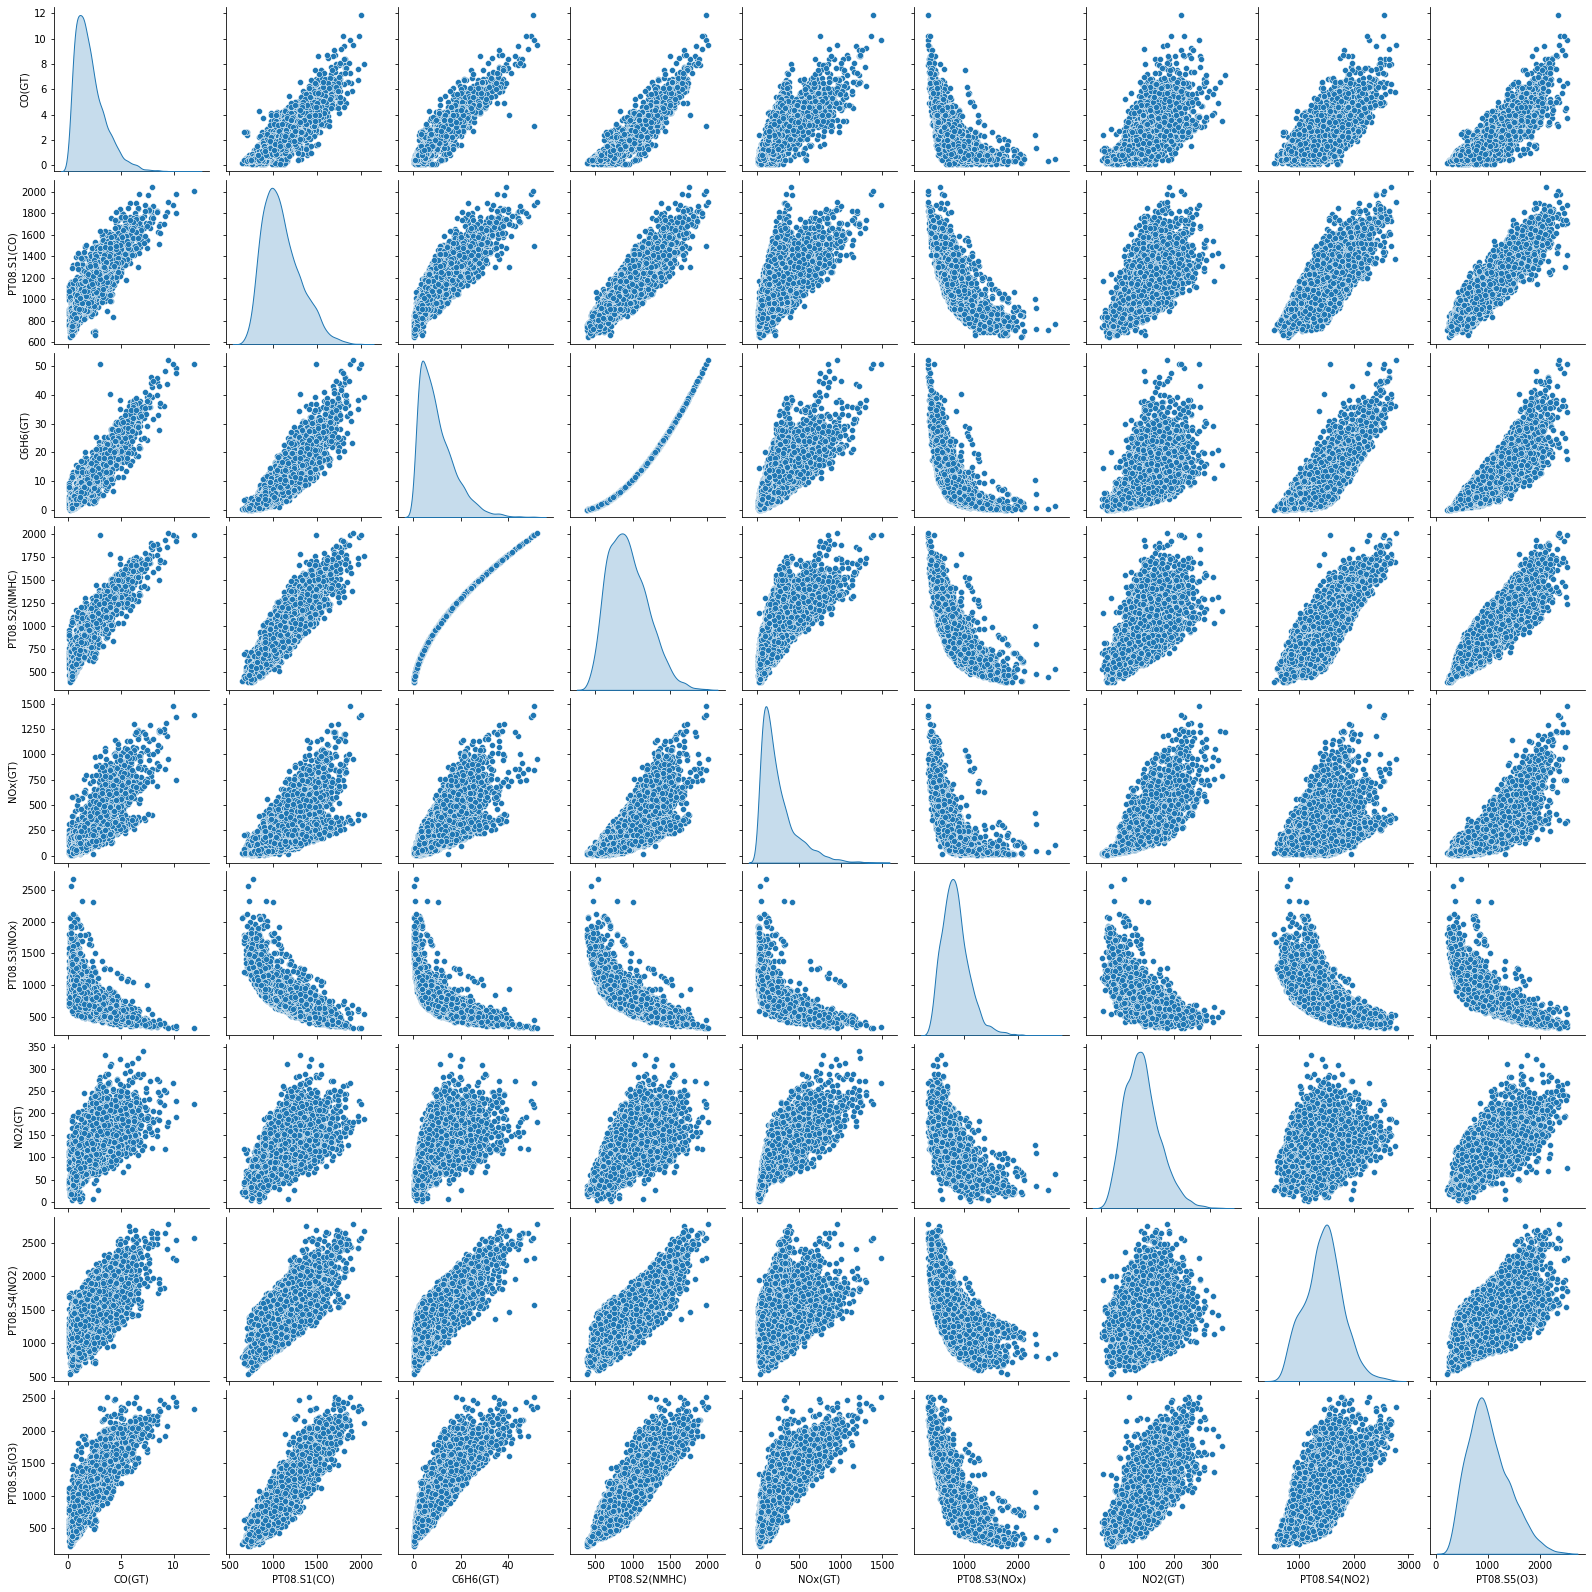

In [105]:
sns.pairplot(train_dataset[['CO(GT)', 'PT08.S1(CO)','C6H6(GT)'	,'PT08.S2(NMHC)'	,'NOx(GT)',	'PT08.S3(NOx)',	'NO2(GT)'	,'PT08.S4(NO2)'	,'PT08.S5(O3)']], diag_kind='kde')

In [106]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [107]:
normalizer.adapt(train_features)

In [109]:
print(normalizer.mean.numpy())

[[nan nan nan nan nan nan nan nan nan nan nan]]


In [110]:
#Create a two-step Keras Sequential model again
# the first layer being normalizer (tf.keras.layers.Normalization(axis=-1))

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=10)
])


In [111]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 43ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [112]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [113]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
188/188 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
188/188 [===========================

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,6.363847,6.121019,95
96,6.359631,6.125190,96
97,6.365293,6.168553,97
98,6.374796,6.177443,98
99,6.418016,6.107253,99


In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

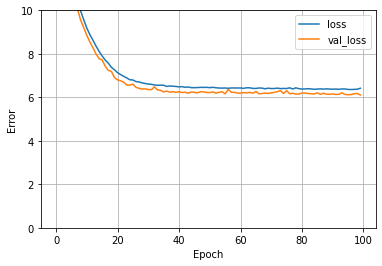

In [30]:
plot_loss(history)

In [31]:
test_results={}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=1)

ValueError: ignored

In [22]:
### model 2
model = keras.Sequential([
      normalizer,
      layers.Dense(units=64),
      layers.Dense(units=64),
      layers.Dense(units=1)
  ])



In [24]:
model.predict(train_features[:10])

1/1 [==============================] - 0s 76ms/step


array([[ 0.36736727],
       [ 0.12169296],
       [ 0.11696559],
       [ 0.08607168],
       [ 0.2491154 ],
       [-0.3067344 ],
       [-0.45293704],
       [-0.25719297],
       [ 0.38300532],
       [-0.24171066]], dtype=float32)

In [25]:
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))

In [26]:
%%time
history_a= model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 33.9065 - val_loss: 14.5609
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 13.5342 - val_loss: 12.2067
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 11.5119 - val_loss: 10.3078
Epoch 4/100
188/188 [==============================] - 0s 3ms/step - loss: 9.8840 - val_loss: 9.0564
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 8.5843 - val_loss: 7.8123
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 7.6350 - val_loss: 7.1555
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 7.1038 - val_loss: 6.8128
Epoch 8/100
188/188 [==============================] - 0s 2ms/step - loss: 6.9225 - val_loss: 6.7552
Epoch 9/100
188/188 [==============================] - 0s 2ms/step - loss: 6.7549 - val_loss: 6.6350
Epoch 10/100
188/188 [==============================] - 0s 2ms/step - loss: 6.7202 - 

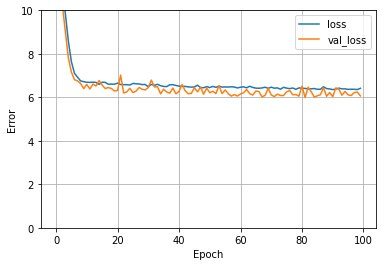

In [32]:
plot_loss(history_a)

In [33]:
model_b = keras.Sequential([
      normalizer,
      layers.Dense(units=100),
      layers.Dense(units=100),
      layers.Dense(units=100),
      layers.Dense(units=1)
  ])

In [34]:
model_b.predict(train_features[:10])

1/1 [==============================] - 0s 231ms/step


array([[-1.3000985 ],
       [-0.35603508],
       [-0.21626978],
       [-0.35178056],
       [-0.76727945],
       [ 0.3018155 ],
       [ 0.5296397 ],
       [ 0.22084346],
       [-1.4300283 ],
       [-0.6425359 ]], dtype=float32)

In [35]:
model_b.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [36]:
history_b= model_b.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 22.7632 - val_loss: 10.8346
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 9.1651 - val_loss: 7.4207
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 7.3309 - val_loss: 6.9190
Epoch 4/100
188/188 [==============================] - 0s 3ms/step - loss: 7.1891 - val_loss: 6.3681
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 7.0684 - val_loss: 6.7468
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 6.9086 - val_loss: 6.2582
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 6.8069 - val_loss: 6.6453
Epoch 8/100
188/188 [==============================] - 1s 3ms/step - loss: 6.8603 - val_loss: 6.7386
Epoch 9/100
188/188 [==============================] - 1s 3ms/step - loss: 6.8800 - val_loss: 6.4988
Epoch 10/100
188/188 [==============================] - 1s 3ms/step - loss: 6.7959 - val_

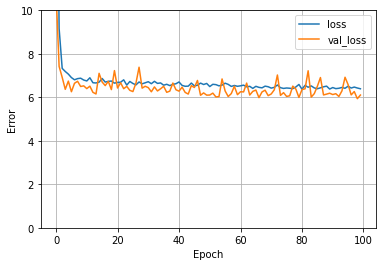

In [37]:
plot_loss(history_b)

In [38]:
model_c = keras.Sequential([
      normalizer,
      layers.Dense(units=200),
      layers.Dense(units=200),
      layers.Dense(units=100),
      layers.Dense(units=100),
      layers.Dense(units=64),
      layers.Dense(units=1)
  ])

In [39]:
model_c.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [40]:
history_c= model_c.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 16.5681 - val_loss: 8.2901
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 8.7248 - val_loss: 7.9216
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 7.5242 - val_loss: 7.0592
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 7.7037 - val_loss: 6.8084
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 7.1195 - val_loss: 6.8308
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 7.2669 - val_loss: 6.6714
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 7.2031 - val_loss: 7.2115
Epoch 8/100
188/188 [==============================] - 1s 5ms/step - loss: 7.3295 - val_loss: 6.6417
Epoch 9/100
188/188 [==============================] - 1s 4ms/step - loss: 7.0104 - val_loss: 6.7212
Epoch 10/100
188/188 [==============================] - 1s 3ms/step - loss: 6.9688 - val_l

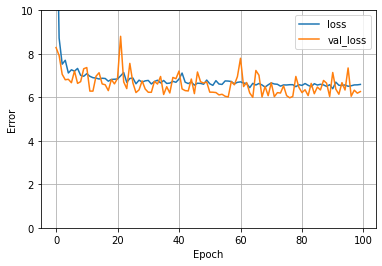

In [41]:
plot_loss(history_c)

In [48]:
model_d = keras.Sequential([
      normalizer,
      layers.Dense(units=800),
      layers.Dense(units=800),
      layers.Dense(units=500),
      layers.Dense(units=800),
      layers.Dense(units=800),
      layers.Dense(units=1)
  ])

In [49]:
model_d.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [50]:
history_d= model_d.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
188/188 [==============================] - 6s 26ms/step - loss: 15.4128 - val_loss: 7.5273
Epoch 2/100
188/188 [==============================] - 4s 23ms/step - loss: 8.4119 - val_loss: 12.9477
Epoch 3/100
188/188 [==============================] - 5s 29ms/step - loss: 8.7584 - val_loss: 7.7474
Epoch 4/100
188/188 [==============================] - 4s 23ms/step - loss: 7.6524 - val_loss: 7.5878
Epoch 5/100
188/188 [==============================] - 4s 23ms/step - loss: 7.7155 - val_loss: 7.9572
Epoch 6/100
188/188 [==============================] - 5s 29ms/step - loss: 7.4719 - val_loss: 7.9067
Epoch 7/100
188/188 [==============================] - 4s 23ms/step - loss: 7.4432 - val_loss: 7.1358
Epoch 8/100
188/188 [==============================] - 5s 24ms/step - loss: 7.3136 - val_loss: 6.6588
Epoch 9/100
188/188 [==============================] - 5s 28ms/step - loss: 7.6666 - val_loss: 7.0144
Epoch 10/100
188/188 [==============================] - 4s 23ms/step - loss: 7.2

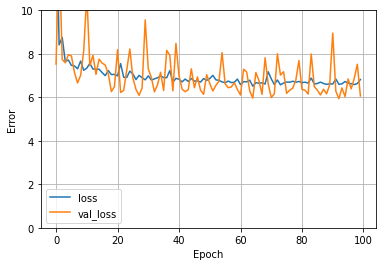

In [51]:
plot_loss(history_d)